# Data Understanding After Cleaning

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

After performing the cleaning, we check again some basic information to show that all the data is correct in the sintax and the semantic, and that the cleaned data are correct.

In [1]:
# Autoreload allows the notebook to dynamically load code: if we update some helper functions *outside* of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sb
import math

import os
import sys
sys.path.append(os.path.abspath('../src'))
from utils import *

In [3]:
csv_file = "../data/races.csv"
races_dataset = pd.read_csv(csv_file)
csv_file = "../data/cyclists.csv"
cyclists_dataset = pd.read_csv(csv_file)
csv_file = "../data/cleaned_cyclists_dataset.csv"
cleaned_cyclists_dataset = pd.read_csv(csv_file)

In [4]:
csv_file = "../data/cleaned_merged_dataset.csv"
dataset = pd.read_csv(csv_file)
dataset.head()

,cyclist_url,cyclist_name,birth_year,weight,height,nationality,race_url,race_name,points,uci_points,...,profile,startlist_quality,date,position,cyclist_age,mostly_tarmac,cyclist_team,delta,race_year,race_stage
0,georges-pintens,Georges Pintens,1946,NaN,NaN,Belgium,amstel-gold-race/1970/result,Amstel Gold Race,225.0,NaN,...,NaN,372,1970-04-25,0,24,False,norway-1987,0.0,1970,result
1,willy-van-neste,Willy Van Neste,1944,NaN,NaN,Belgium,amstel-gold-race/1970/result,Amstel Gold Race,225.0,NaN,...,NaN,372,1970-04-25,1,26,False,norway-1987,0.0,1970,result
2,andre-dierickx,André Dierickx,1947,74.0,180.0,Belgium,amstel-gold-race/1970/result,Amstel Gold Race,225.0,NaN,...,NaN,372,1970-04-25,2,23,False,spain-1991,22.0,1970,result
3,eric-leman,Eric Leman,1946,NaN,NaN,Belgium,amstel-gold-race/1970/result,Amstel Gold Race,225.0,NaN,...,NaN,372,1970-04-25,3,24,False,spain-1991,33.0,1970,result
4,joseph-schoeters,Joseph Schoeters,1947,NaN,NaN,Belgium,amstel-gold-race/1970/result,Amstel Gold Race,225.0,NaN,...,NaN,372,1970-04-25,4,23,False,NaN,33.0,1970,result


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589739 entries, 0 to 589738
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cyclist_url        589739 non-null  object 
 1   cyclist_name       589739 non-null  object 
 2   birth_year         589739 non-null  int64  
 3   weight             480007 non-null  float64
 4   height             480007 non-null  float64
 5   nationality        589739 non-null  object 
 6   race_url           589739 non-null  object 
 7   race_name          589739 non-null  object 
 8   points             589739 non-null  float64
 9   uci_points         422184 non-null  float64
 10  length             589739 non-null  float64
 11  climb_total        475338 non-null  float64
 12  profile            475338 non-null  float64
 13  startlist_quality  589739 non-null  int64  
 14  date               589739 non-null  object 
 15  position           589739 non-null  int64  
 16  cy

In [6]:
dataset.describe()

,birth_year,weight,height,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,race_year
count,589739.000000,480007.000000,480007.000000,589739.000000,422184.000000,589739.000000,475338.000000,475338.000000,589739.000000,589739.000000,589739.000000,589739.000000,589739.000000
mean,1977.683221,68.362072,179.699850,89.225897,70.663263,166776.290800,2321.864564,2.585028,1101.182822,74.217408,28.485834,430.755887,2006.169054
std,11.537102,6.182201,6.269585,54.415806,120.160957,64543.334848,1381.120350,1.502340,380.588233,48.405261,3.855921,1011.486288,11.476909
min,1933.000000,48.000000,154.000000,18.000000,6.000000,1000.000000,2.000000,1.000000,115.000000,0.000000,13.000000,0.000000,1970.000000
25%,1970.000000,64.000000,175.000000,50.000000,16.000000,152500.000000,1289.000000,1.000000,844.000000,32.000000,26.000000,11.000000,1999.000000
50%,1979.000000,68.000000,180.000000,80.000000,20.000000,178200.000000,2243.000000,2.000000,988.000000,70.000000,28.000000,158.000000,2008.000000
75%,1986.000000,73.000000,184.000000,100.000000,100.000000,203500.000000,3260.000000,4.000000,1309.000000,112.000000,31.000000,626.000000,2015.000000
max,2004.000000,94.000000,204.000000,350.000000,800.000000,338000.000000,6974.000000,5.000000,2047.000000,209.000000,56.000000,46380.000000,2023.000000


## Checks of cyclists data

Now we start from the data related to the initial cyclist dataset (we consider only the modified columns)

### Check on `birth_year` data

We just check that all years are in the right format

In [7]:
# Remove '.0' from 'birth_year' and check if it's a valid year in the form '19nn' or '20nn'
def is_valid_year(birth_year):
    year = str(birth_year).replace('.0', '')
    return year.isdigit() and (year.startswith('19') or year.startswith('20'))

invalid_rows = dataset[dataset['birth_year'].notnull()]
invalid_rows = invalid_rows[~invalid_rows['birth_year'].apply(is_valid_year)]

print('Number of invalid birth_year: ' + str(len(invalid_rows)))

Number of invalid birth_year: 0


### Check on `weight` and `height` data

We check that the remaining null values of weight and height are only of the cyclist where they are both missings


In [8]:
# Filter rows where both 'weight' and 'height' are null
missing_weight_missing_height = dataset[dataset['weight'].isnull() & dataset['height'].isnull()]

print("Cyclists where we don't have both weight and height:", len(missing_weight_missing_height))
dataset[['weight', 'height']].isnull().sum()

Cyclists where we don't have both weight and height: 109732


weight    109732
height    109732
dtype: int64

We also check that all values respect the same format

In [9]:
# Check that every value in 'height' and 'weight' (without considering the null values) is a number with 1 decimal point

def is_valid_number(value):
    if pd.notnull(value):
        return bool(re.match(r'^\d+\.\d$', str(value)))
    return True # If the value is null, we consider it valid

invalid_height = dataset[~dataset['height'].apply(is_valid_number)]
invalid_weight = dataset[~dataset['weight'].apply(is_valid_number)]

print('Number of invalid height: ' + str(len(invalid_height)))
print('Number of invalid weight: ' + str(len(invalid_weight)))

Number of invalid height: 0
Number of invalid weight: 0


### Check on `nationality` data

We check that every nationality is a string with no number

In [10]:
# Check if there are 'nationality' values that contains any number
invalid_rows = dataset[dataset['nationality'].str.contains(r'\d')]

print('Number of rows with numbers in nationality: ' + str(len(invalid_rows)))

Number of rows with numbers in nationality: 0


## Checks of races data

### Check on `points` data

For each url, check if all the `points` values are the same

In [11]:
# Group by '_url' and calculate the number of unique values in the 'points' column
points_uniques = dataset.groupby('race_url')['points'].nunique(dropna=False)
# Filter the URLs with more than one unique points
multiple_points_urls = points_uniques[points_uniques > 1].index

print('Number of URLs with more than one unique points: ' + str(len(multiple_points_urls)))

Number of URLs with more than one unique points: 0


Check that all points respect the correct fromat

In [12]:
# Check that every value in 'points' is a number that finish with '.0'
def is_valid_integer(value):
    if pd.notnull(value):
        return bool(re.match(r'^\d+\.0$', str(value)))
    return True # If the value is null, we consider it valid

invalid_points = dataset[~dataset['points'].apply(is_valid_integer)]

print('Number of invalid points: ' + str(len(invalid_points)))

Number of invalid points: 0


### Check on `uci_points` data

In [13]:
print('Total number of null values in uci_points column: ' + str(dataset['uci_points'].isnull().sum())
      + ' (' + str(round(dataset['uci_points'].isnull().sum() / len(dataset) * 100, 2)) + '%)')

null_values_before_2001 = dataset[dataset['uci_points'].isnull() & (dataset['race_year'] < 2001)]
null_values_after_2001 = dataset[dataset['uci_points'].isnull() & (dataset['race_year'] >= 2001)]

print('Number of null values in uci_points column before 2001: ' + str(len(null_values_before_2001)))
print('Number of null values in uci_points column after 2001: ' + str(len(null_values_after_2001)))

Total number of null values in uci_points column: 167555 (28.41%)
Number of null values in uci_points column before 2001: 167555
Number of null values in uci_points column after 2001: 0


In [14]:
# Group by '_url' and calculate the number of unique values in the 'uci_points' column
uci_points_uniques = dataset.groupby('race_url')['uci_points'].nunique(dropna=False)
# Filter the URLs with more than one unique uci_points
multiple_uci_points_urls = uci_points_uniques[uci_points_uniques > 1].index

print('Number of URLs with more than one unique uci_points: ' + str(len(multiple_uci_points_urls)))

Number of URLs with more than one unique uci_points: 0


In [15]:
# Check that every value in 'uci_points' is a number that finish with '.0'
def is_valid_integer(value):
    if pd.notnull(value):
        return bool(re.match(r'^\d+\.0$', str(value)))
    return True # If the value is null, we consider it valid

invalid_points = dataset[~dataset['uci_points'].apply(is_valid_integer)]

print('Number of invalid uci points: ' + str(len(invalid_points)))

Number of invalid uci points: 0


### Check on `climb_total` data

In [16]:
print('Total number of null values in climb_total column: ' + str(dataset['climb_total'].isnull().sum())
      + ' (' + str(round(dataset['climb_total'].isnull().sum() / len(dataset) * 100, 2)) + '%)')

Total number of null values in climb_total column: 114401 (19.4%)


For each url, check if all the `climb_total` values are the same


In [17]:
# Group by '_url' and calculate the number of unique values in the 'climb_total' column
climb_total_uniques = dataset.groupby('race_url')['climb_total'].nunique(dropna=False)
# Filter the URLs with more than one unique climb_total
multiple_climb_total_urls = climb_total_uniques[climb_total_uniques > 1].index

print('Number of URLs with more than one unique climb_total: ' + str(len(multiple_climb_total_urls)))

Number of URLs with more than one unique climb_total: 0


### Check on `profile` data

Now we consider the `profile` column, and check the number of null values and the count the occurrences of each unique value

In [18]:
print('Total number of null values in profile column: ' + str(dataset['profile'].isnull().sum())
      + ' (' + str(round(dataset['profile'].isnull().sum() / len(dataset) * 100, 2)) + '%)')

# Sort by profile value
profile_counts = dataset['profile'].value_counts().sort_index()
print(profile_counts)

Total number of null values in profile column: 114401 (19.4%)
profile
1.0    147246
2.0    138083
3.0     50842
4.0     43011
5.0     96156
Name: count, dtype: int64


In [19]:
# Group by '_url' and calculate the number of unique values in the 'profile' column
profile_uniques = dataset.groupby('race_url')['profile'].nunique(dropna=False)
# Filter the URLs with more than one unique profile
multiple_profile_urls = profile_uniques[profile_uniques > 1].index

print('Number of URLs with more than one unique profile: ' + str(len(multiple_profile_urls)))

Number of URLs with more than one unique profile: 0


## Check on `date` data

For each url, check if all the `date` values are the same

In [20]:
# Group by '_url' and calculate the number of unique values in the 'date' column
date_uniques = dataset.groupby('race_url')['date'].nunique(dropna=False)
# Filter the URLs with more than one unique date
multiple_date_urls = date_uniques[date_uniques > 1].index

print('Number of URLs with more than one unique date: ' + str(len(multiple_date_urls)))

Number of URLs with more than one unique date: 0


Since we have a lot of different values, we check if every value is sintatically correct

In [21]:
# Check if there are any 'date' values not in the format yyyy-mm-dd (in the merged dataset)
invalid_rows = dataset[dataset['date'].str.match(r'\d{4}-\d{2}-\d{2}')]
print('Number of invalid dates: ' + str(len(invalid_rows)))

Number of invalid dates: 589739


### Check on `position` data

For each url, check if there are all the `position` values

In [22]:
# Function to check if the positions are from 0 to the max one after the other
def check_positions(positions):
    return np.array_equal(np.sort(positions), np.arange(positions.max() + 1))

invalid_urls = dataset.groupby('race_url')['position'].apply(lambda x: not check_positions(x))

print('Number of URLs with invalid positions: ' + str(len(invalid_urls[invalid_urls])))

Number of URLs with invalid positions: 98


We have this because we delete the duplicated cyclist in the same race

### Check on `cyclist_age` data

Now we consider the `cyclist_age` column, and check the number of null values and the count the occurrences of each unique value

In [23]:
print('Total number of null values in cyclist_age column: ' + str(dataset['cyclist_age'].isnull().sum())
      + ' (' + str(round(dataset['cyclist_age'].isnull().sum() / dataset.shape[0] * 100, 2)) + '%)')

Total number of null values in cyclist_age column: 0 (0.0%)


### Check on `cyclist_team` data

Now we consider the `cyclist_team` column, and check the number of null values and the count the occurrences of each unique value

In [24]:
# Print total number of null values in 'delta' column, and the percentage of null values (float with two decimal digits after the comma)
print('Total number of null values in cyclist_team column: ' + str(dataset['cyclist_team'].isnull().sum())
      + ' (' + str(round(dataset['cyclist_team'].isnull().sum() / dataset.shape[0] * 100, 2)) + '%)')

Total number of null values in cyclist_team column: 138634 (23.51%)


In [25]:
# Check if every 'cyclist_team' value matches the required format
invalid_teams = dataset[dataset['cyclist_team'].notnull() & ~dataset['cyclist_team'].astype(str).str.match(r'.+-\d{4}')]

print('Number of invalid rows: ' + str(len(invalid_teams)))

Number of invalid rows: 0


### Check on `delta` data

Now we consider the `delta` column, and check the number of null values and the count the occurrences of each unique value

In [26]:
print('Total number of null values in delta column: ' + str(dataset['delta'].isnull().sum())
        + ' (' + str(round(dataset['delta'].isnull().sum() / dataset.shape[0] * 100, 2)) + '%)')

Total number of null values in delta column: 0 (0.0%)


In [27]:
# Check if there are any 'delta' values that do not end with '.0'
invalid_rows = dataset[~dataset['delta'].astype(str).str.endswith('.0')]

print('Number of invalid deltas: ' + str(len(invalid_rows)))

Number of invalid deltas: 0


In [28]:
# Check if there are any 'delta' values that are negative
invalid_rows = dataset[dataset['delta'] < 0]

print('Number of negative deltas: ' + str(len(invalid_rows)))
for index, row in invalid_rows.iterrows():
    print(row['_url'], row['delta'])

Number of negative deltas: 0


Check if following the `positon` order, the delta is ordered too

In [29]:
# Grouped by '_url', check if the 'delta' value is greater or equal than the previous one (the one in the previous row, except for the first one)
invalid_urls = dataset.groupby(['race_url', 'delta'])['delta'].apply(lambda x: (x.shift() > x).any())

# Print the number of URLs with invalid 'delta' values
print('Number of URLs with invalid deltas: ' + str(len(invalid_urls[invalid_urls])))
for url in invalid_urls[invalid_urls].index:
    print(url)

Number of URLs with invalid deltas: 0


### Check on `race_year` data

Now we consider the `race_year` column, and check the number of null values and the count the occurrences of each unique value

In [30]:
# Print total number of null values in 'race_year' column, and the percentage of null values (float with two decimal digits after the comma)
print('Total number of null values in year column: ' + str(dataset['race_year'].isnull().sum()))

Total number of null values in year column: 0


For each url, check if all the `race_year` values are the same

In [31]:
# Group by 'race_url' and calculate the number of unique values in the 'race_year' column
race_year_uniques = dataset.groupby('race_url')['race_year'].nunique(dropna=False)
# Filter the URLs with more than one unique race_year
multiple_race_year_urls = race_year_uniques[race_year_uniques > 1].index

print('Number of URLs with more than one unique race_year: ' + str(len(multiple_race_year_urls)))

Number of URLs with more than one unique race_year: 0


In [32]:
# Check that the year match the year in the url (race/year/stage) and in the date (year-month-day)
def get_year_from_url(url):
    return int(url.split('/')[1])

def get_year_from_date(date):
    return int(date.split('-')[0])

# Check if the year in 'race_year' matches the year extracted from 'race_url' and 'date'
invalid_year_rows = dataset[
    (dataset['race_year'] != dataset['race_url'].apply(get_year_from_url)) | (dataset['race_year'] != dataset['date'].apply(get_year_from_date))
]

print('Number of rows with invalid year: ' + str(len(invalid_year_rows)))

Number of rows with invalid year: 0


### Check on `race_stage` data

Now we consider the `race_stage` column, and check the number of null values and the count the occurrences of each unique value

In [33]:
# Print total number of null values in 'race_stage' column, and the percentage of null values (float with two decimal digits after the comma)
print('Total number of null values in stage column: ' + str(dataset['race_stage'].isnull().sum()))

Total number of null values in stage column: 0


For each url, check if all the `race_stage` values are the same

In [34]:
# Group by 'race_url' and calculate the number of unique values in the 'race_stage' column
race_stage_uniques = dataset.groupby('race_url')['race_stage'].nunique(dropna=False)
# Filter the URLs with more than one unique race_stage
multiple_race_stage_urls = race_stage_uniques[race_stage_uniques > 1].index

print('Number of URLs with more than one unique race_stage: ' + str(len(multiple_race_stage_urls)))

Number of URLs with more than one unique race_stage: 0


In [35]:
# Check that the stage match the stage in the url (race/year/stage)
def get_stage_from_url(url):
    return url.split('/')[2]

# Check if the stage in the race_stage matches the stage extracted from 'race_url'
invalid_stage_rows = dataset[
    (dataset['race_stage'] != dataset['race_url'].apply(get_stage_from_url))
]

print('Number of rows with invalid stage: ' + str(len(invalid_stage_rows)))

Number of rows with invalid stage: 0


## Data-Balance Analysis 

In [36]:
n_bins = math.ceil(math.log2(len(cyclists_dataset)) + 1)

### Distribution of `birth_year`

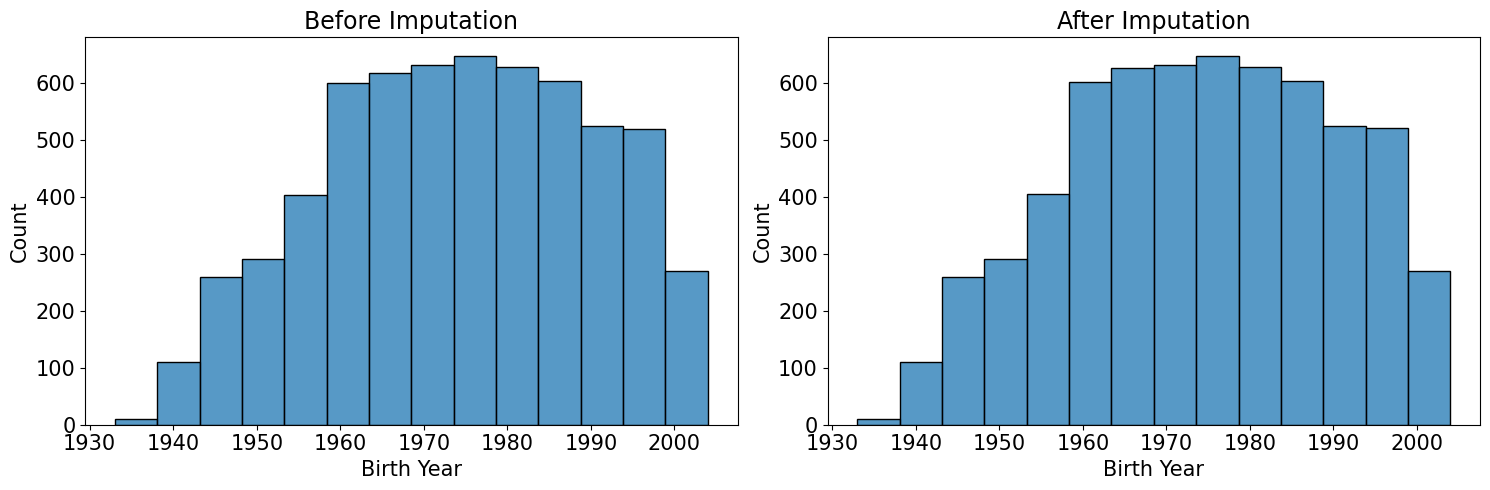

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(cyclists_dataset, 
            x="birth_year", 
            bins=n_bins, 
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Birth Year', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(cleaned_cyclists_dataset,
            x="birth_year",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Birth Year', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

### Distribution of `weight` and `height`

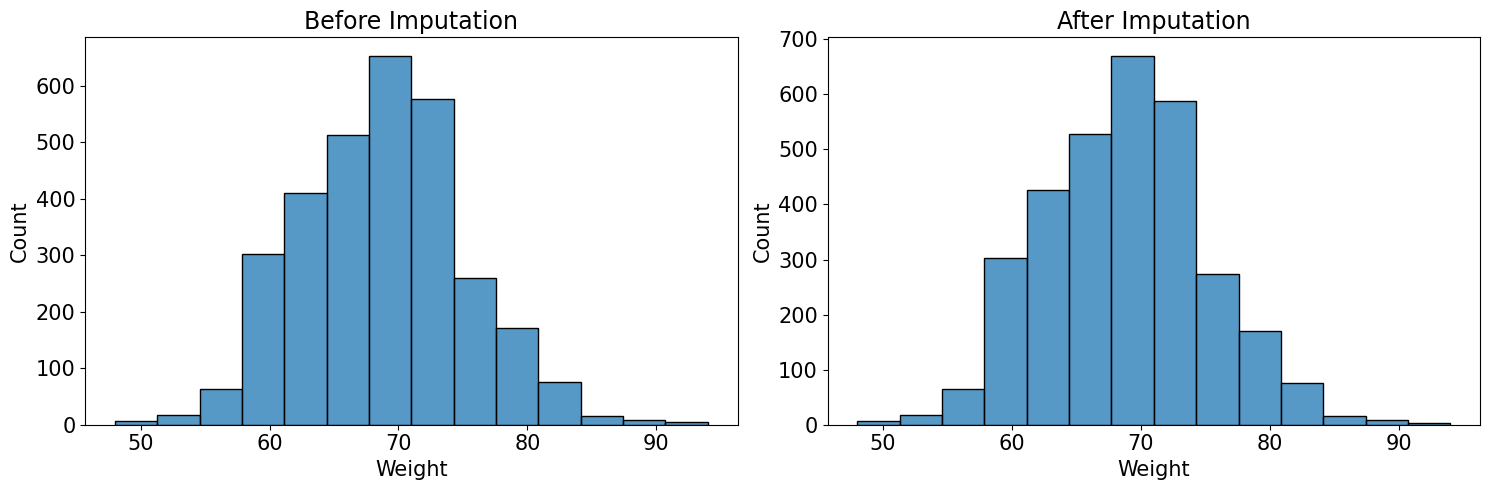

In [38]:
# Distirbution of weights
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(cyclists_dataset, 
            x="weight", 
            bins=n_bins, 
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Weight', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(cleaned_cyclists_dataset,
            x="weight",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Weight', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

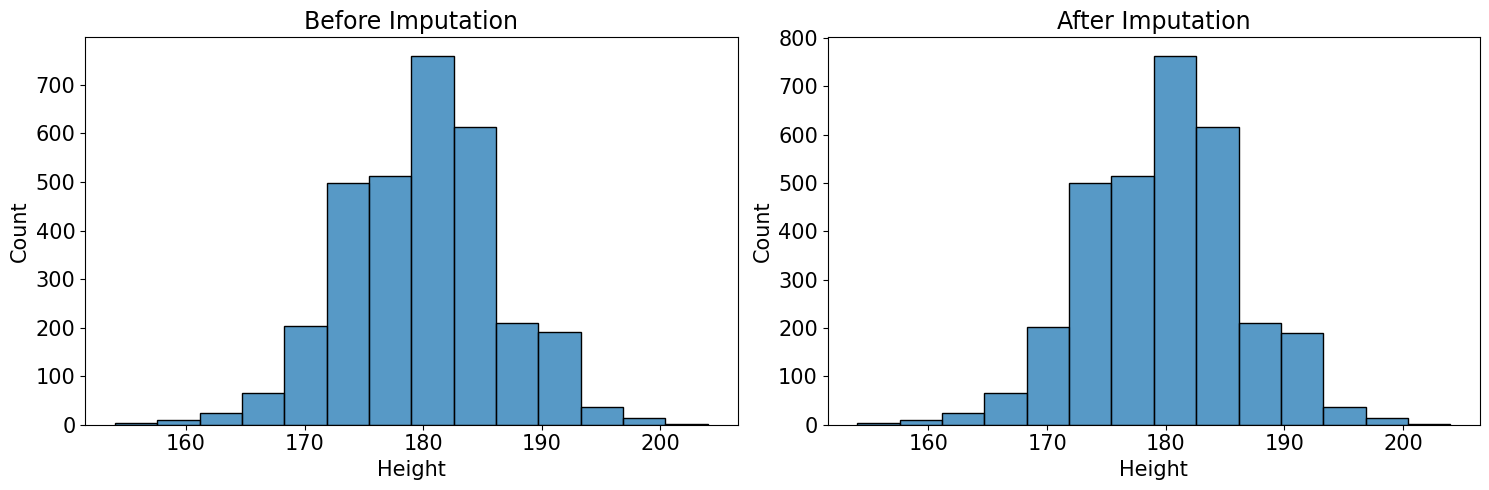

In [39]:
# Distribution of heights
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(cyclists_dataset,
            x="height",
            bins=n_bins,
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Height', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(cleaned_cyclists_dataset,
            x="height",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Height', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

### Distribution of `points` and `uci_points`

In [40]:
unique_data_races = races_dataset.drop_duplicates(subset=['_url', 'points', 'uci_points'])
unique_data_cleaned = dataset.drop_duplicates(subset=['race_url', 'points', 'uci_points'])
n_bins = math.ceil(math.log2(len(unique_data_races)) + 1)

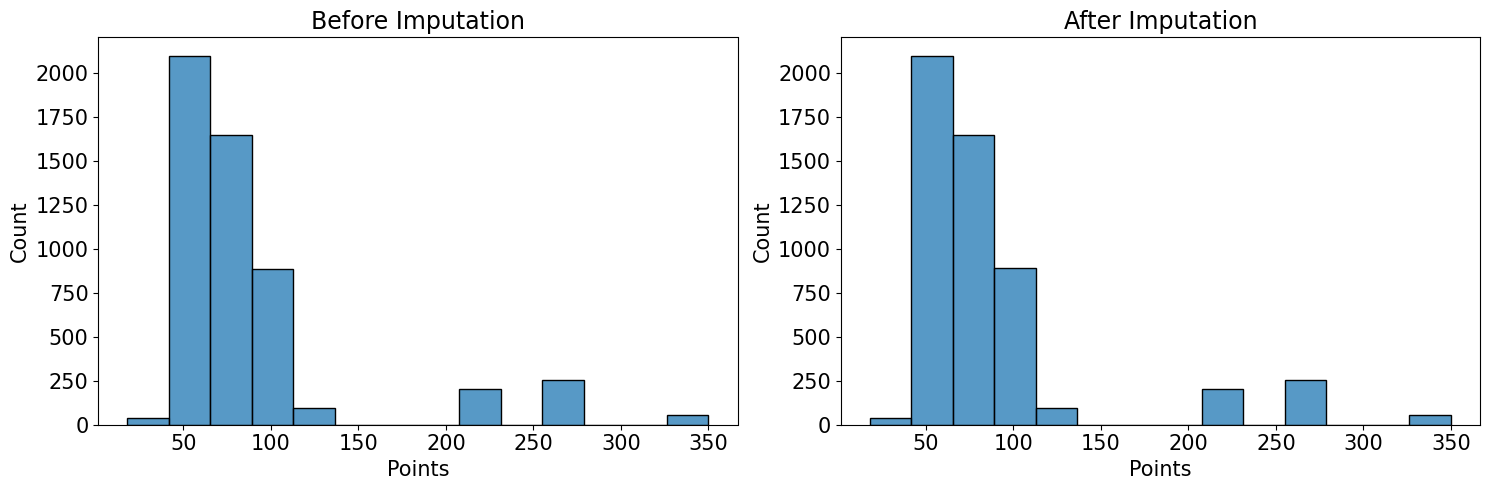

In [41]:
# Distribution of points
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(unique_data_races,
            x="points", 
            bins=n_bins, 
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Points', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(unique_data_cleaned,
            x="points",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Points', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

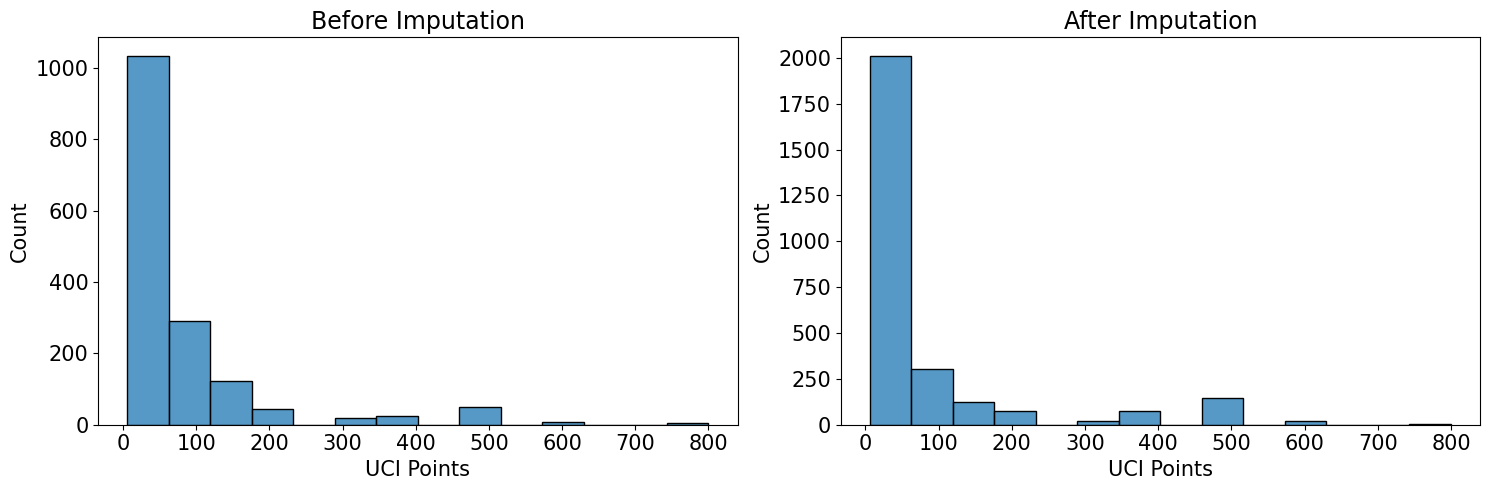

In [42]:
# Distribution of uci points
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(unique_data_races,
            x="uci_points", 
            bins=n_bins, 
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('UCI Points', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(unique_data_cleaned,
            x="uci_points",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('UCI Points', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

### Distributions `climb_total` and `profile`

In [43]:
unique_data_races = races_dataset.drop_duplicates(subset=['_url', 'climb_total', 'profile'])
unique_data_cleaned = dataset.drop_duplicates(subset=['race_url', 'climb_total', 'profile'])
n_bins = math.ceil(math.log2(len(unique_data_races)) + 1)

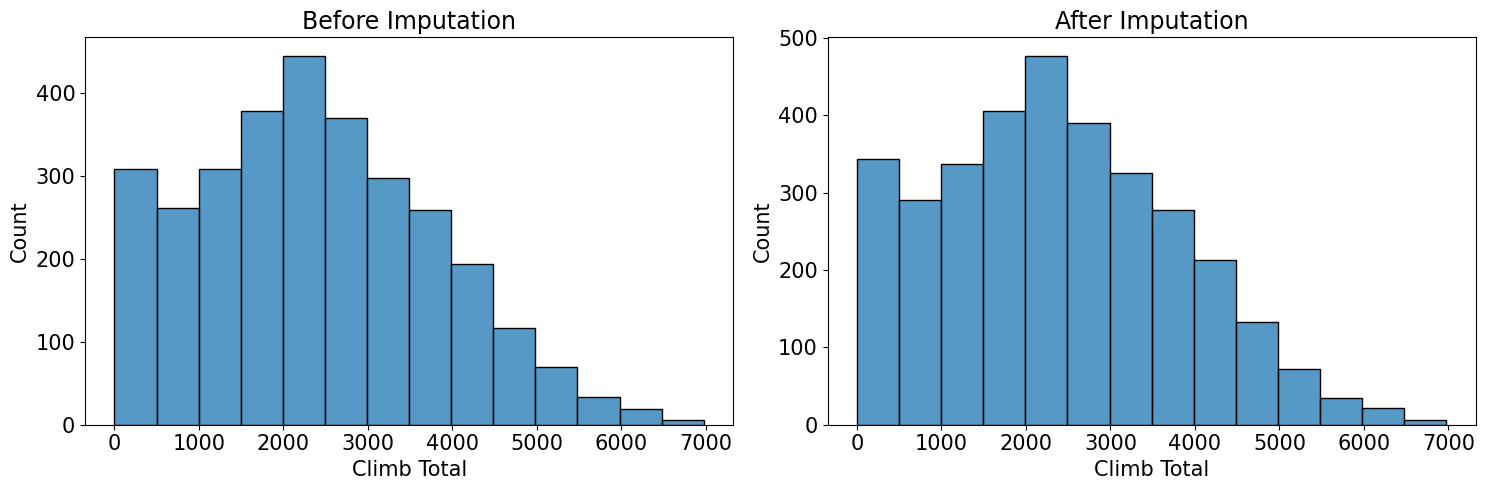

In [44]:
# Distribution climb total
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(unique_data_races,
            x="climb_total", 
            bins=n_bins, 
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Climb Total', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(unique_data_cleaned,
            x="climb_total",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Climb Total', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

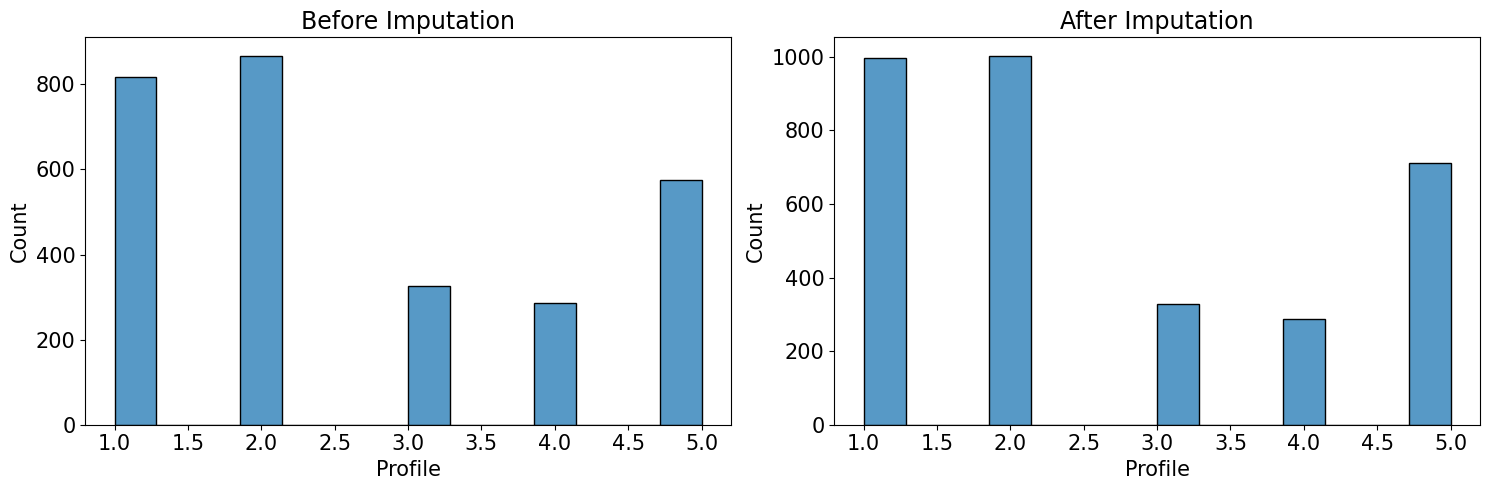

In [45]:
# Distribution of profile
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(unique_data_races,
            x="profile",
            bins=n_bins,
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Profile', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(unique_data_cleaned,
            x="profile",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Profile', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

### Distribution of `cyclist_team`

In [46]:
n_bins = math.ceil(math.log2(len(races_dataset)) + 1)

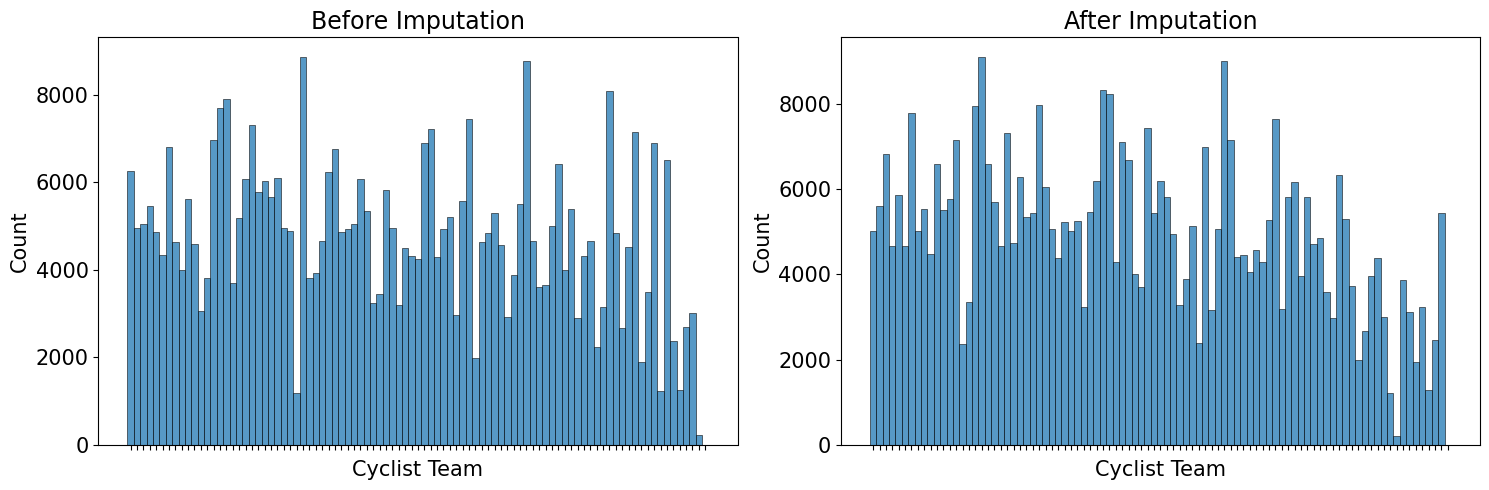

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(races_dataset,
            x="cyclist_team",
            bins=n_bins,
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Cyclist Team', fontsize=15)
axes[0].set_xticklabels([])
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(dataset,
            x="cyclist_team",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Cyclist Team', fontsize=15)
axes[1].set_xticklabels([])
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

### Distribution of `cyclist_age`

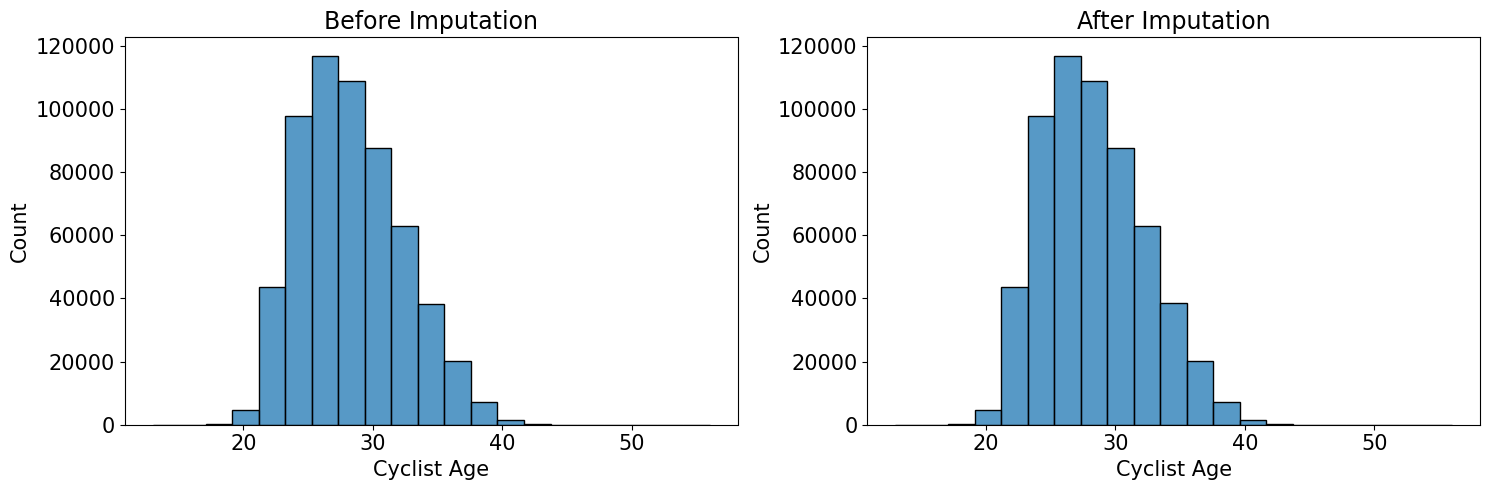

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(races_dataset,
            x="cyclist_age",
            bins=n_bins,
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Cyclist Age', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(dataset,
            x="cyclist_age",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Cyclist Age', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

### Distribution of `delta`

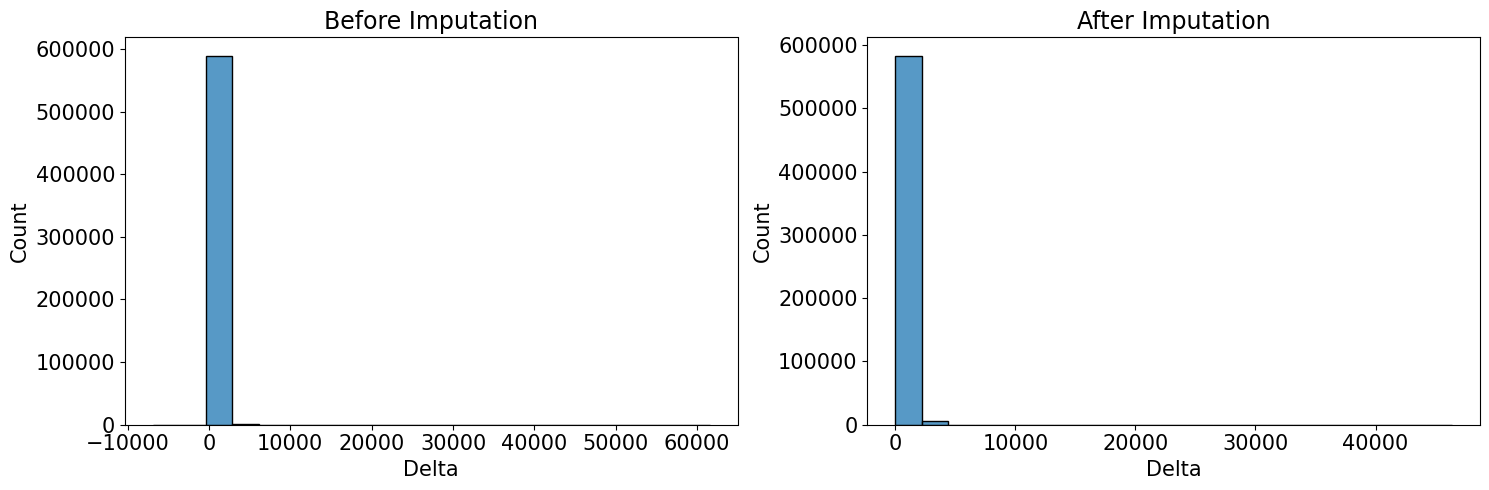

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.histplot(races_dataset,
            x="delta",
            bins=n_bins,
            ax=axes[0])
axes[0].set_title('Before Imputation', fontsize=17)
axes[0].set_xlabel('Delta', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

sb.histplot(dataset,
            x="delta",
            bins=n_bins,
            ax=axes[1])
axes[1].set_title('After Imputation', fontsize=17)
axes[1].set_xlabel('Delta', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

Upon examining the distributions of various attributes before and after imputation, we observe that the distributions remain essentially the same. This consistency is a positive outcome, indicating that the imputation process has preserved the original data characteristics. 

For all the attributes, the histograms show that the overall shape and spread of the data have not significantly changed post-imputation. This suggests that the imputation method used has effectively filled in the missing values without introducing any bias or distortion to the data.

However, it is important to note a slight difference in the distribution of `cyclist_team` and `delta` values. For the first one, we have this difference because we impute the cyclist team only for some cyclist where we have the cyclist team present in different races. For the second one, this discrepancy arises because negative `delta` values were removed during the data cleaning process.

Overall, the preservation of the original distributions post-imputation ensures that the integrity and reliability of the data are maintained, allowing for accurate and meaningful analysis.

## Correlations Data

In [50]:
# Correlations Merged Dataset
normalized_dataset, normalization_scalers = center_and_scale(dataset)
correlations_dataset = correlations(normalized_dataset)
correlations_dataset

,birth_year,weight,height,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,race_year,correlation_type
birth_year,1.000000,-0.045815,0.084267,-0.188950,0.343416,-0.063052,0.045471,0.124779,-0.143592,0.086474,-0.144127,0.080669,0.797947,kendall
weight,-0.045815,1.000000,0.563195,0.053643,0.030793,0.032437,-0.020882,-0.032249,0.038300,0.082839,0.038231,0.071599,-0.029891,kendall
height,0.084267,0.563195,1.000000,0.011802,0.058356,0.009892,-0.004051,-0.000033,0.007022,0.068314,-0.008612,0.057979,0.085670,kendall
points,-0.188950,0.053643,0.011802,1.000000,0.550895,0.283126,0.047106,-0.075127,0.387596,0.011434,-0.005472,0.069104,-0.184945,kendall
uci_points,0.343416,0.030793,0.058356,0.550895,1.000000,0.171325,0.062417,0.030337,0.100071,-0.018360,0.018996,0.083091,0.416651,kendall
length,-0.063052,0.032437,0.009892,0.283126,0.171325,1.000000,0.267466,0.041135,0.064064,-0.015397,-0.002384,0.029699,-0.062855,kendall
climb_total,0.045471,-0.020882,-0.004051,0.047106,0.062417,0.267466,1.000000,0.566273,0.012358,-0.023282,0.005327,0.334962,0.049335,kendall
profile,0.124779,-0.032249,-0.000033,-0.075127,0.030337,0.041135,0.566273,1.000000,-0.083554,-0.022523,0.008102,0.412745,0.132006,kendall
startlist_quality,-0.143592,0.038300,0.007022,0.387596,0.100071,0.064064,0.012358,-0.083554,1.000000,0.097512,0.033595,0.032480,-0.137662,kendall
position,0.086474,0.082839,0.068314,0.011434,-0.018360,-0.015397,-0.023282,-0.022523,0.097512,1.000000,0.006373,0.299288,0.085453,kendall


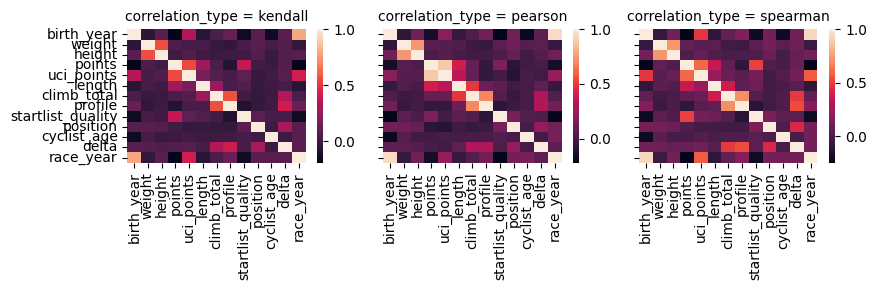

In [51]:
g = sb.FacetGrid(correlations_dataset, col="correlation_type")
g.map_dataframe(lambda data, color: sb.heatmap(data[data.columns[:-1]]))

#### High Correlations
**`birth_year` and `race_year`**:
   - Pearson: 0.943870
   - Spearman: 0.934868
   - Kendall: 0.797947
   - These values indicate a strong positive correlation between birth year and race year.

**`points` and `uci_points`**:
   - Pearson: 0.887946
   - Spearman: 0.608062
   - Kendall: 0.550895
   - These values indicate a strong positive correlation between points and UCI points.

**`height` and `weight`**:
   - Pearson: 0.741987
   - Spearman: 0.728428
   - Kendall: 0.563195
   - These values indicate a strong positive correlation between height and weight.

**`climb_total` and `profile`**:
   - Pearson: 0.696085
   - Spearman: 0.712674
   - Kendall: 0.566273
   - These values indicate a strong positive correlation between climb total and profile.


### Conclusion
The attributes with the highest correlations are:
- **`birth_year` and `race_year`**
- **`points` and `uci_points`**
- **`height` and `weight`**
- **`climb_total` and `profile`**

This information can be useful to understand which variables are more closely related to each other and which have a weak or null relationship.